,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


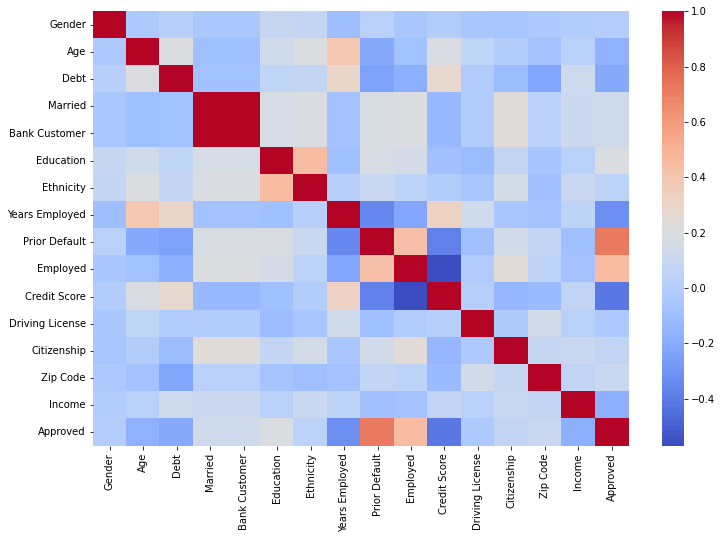

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize as normalizeSk


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


def filterDf(df, colNames):
    for cols in colNames:
        d = {}
        for i in df[cols]:
            if i not in d:
                d[i] = len(d)
        df[cols] = df[cols].map(d)

def handleMissingNumeric(df, colNames):
    for col in colNames:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].fillna(df[col].mean())

def fillUnknown(df, colNames):
    for col in colNames:
        temp = df[col].value_counts().to_dict()    
        if '?' in temp:
            temp['?'] = max(temp)

        for i in temp:
            if i!='?':
                temp[i] = i
        df[col] = df[col].map(temp)


headerRow = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income', 'Approved']

df = pd.read_csv('/content/crx.data', names = headerRow)

display(df)


#To replace ? using pd
#df = df.replace('?', np.nan)
#df.fillna(method = 'ffill', inplace = True)

#To replace ? using mine
#fillUnknown(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship'])
handleMissingNumeric(df, ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income'])

#sns.distplot(df['Age'])
#filterDf(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

dim = (12, 8)
fig, ax = plt.subplots(figsize = dim)


#sns.countplot(data = df, x = 'Citizenship')
features = ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income']


#scaler = StandardScaler()
#df[features] = scaler.fit_transform(df[features])

#p = features[5]
#sns.distplot(df[p])

#sns.set()
#cols = ['Age', 'Income', 'Credit Score', 'Debt', 'Years Employed']
#sns.pairplot(df[cols], size = 2.5)
#plt.show();


allFeatures = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income']


kaamWaleFeatures = []

filterDf(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

cMatrix = df.corr()
sns.heatmap(cMatrix, annot = False, cmap = 'coolwarm')

In [3]:
headerRow = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income', 'Approved']

df = pd.read_csv('/content/crx.data', names = headerRow)

display(df)
df.info()
df.tail(17)

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    object 
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   Bank Customer    690 non-null    object 
 5   Education        690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   Years Employed   690 non-null    float64
 8   Prior Default    690 non-null    object 
 9   Employed         690 non-null    object 
 10  Credit Score     690 non-null    int64  
 11  Driving License  690 non-null    object 
 12  Citizenship      690 non-null    object 
 13  Zip Code         690 non-null    object 
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [4]:
df.describe()

,Debt,Years Employed,Credit Score,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [5]:
import numpy as np

# Inspect missing values in the dataset
# Replace the '?'s with NaN
df = df.replace('?',np.nan)
df.tail(17)

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [6]:
# Iterate over each column of df
for col in df:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df = df.fillna(df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(df.isnull().sum())

Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education          0
Ethnicity          0
Years Employed     0
Prior Default      0
Employed           0
Credit Score       0
Driving License    0
Citizenship        0
Zip Code           0
Income             0
Approved           0
dtype: int64


In [7]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    int64  
 1   Age              690 non-null    int64  
 2   Debt             690 non-null    float64
 3   Married          690 non-null    int64  
 4   Bank Customer    690 non-null    int64  
 5   Education        690 non-null    int64  
 6   Ethnicity        690 non-null    int64  
 7   Years Employed   690 non-null    float64
 8   Prior Default    690 non-null    int64  
 9   Employed         690 non-null    int64  
 10  Credit Score     690 non-null    int64  
 11  Driving License  690 non-null    int64  
 12  Citizenship      690 non-null    int64  
 13  Zip Code         690 non-null    int64  
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 86.4 KB
None


In [8]:
df.isnull().sum()

Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education          0
Ethnicity          0
Years Employed     0
Prior Default      0
Employed           0
Credit Score       0
Driving License    0
Citizenship        0
Zip Code           0
Income             0
Approved           0
dtype: int64

In [9]:
x = ['Gender', 'Age', 'Debt', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Income']
y = ['Approved']

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[x], df[y],test_size=0.30,random_state=2)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

trainAcc = []
testAcc = []

for i in range(1, 2):
    
    dtc = LogisticRegression(random_state = 0)

    dtc.fit(xTrain, yTrain)
    
    trainPred = dtc.predict(xTrain)
    trainAcc.append(score(trainPred, yTrain)*100)
    
    #print(round(score(trainPred, trainDf[y]), 4))

    testPred = dtc.predict(xTest)
    testAcc.append(score(testPred, yTest)*100)
    
    print('{}, {}, {}'.format(i, round(score(trainPred, yTrain), 4), round(score(testPred, yTest), 4)))
    
    #print('Test : ', score(testPred, testDf[y]))

1, 0.8571, 0.8841


In [10]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

trainPred = clf.predict(xTrain)
testPred = clf.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.968944, Test : 0.869565


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

tol = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
max_iter = [50, 100, 150, 200, 250, 300]
param_grid = dict(tol=tol, max_iter=max_iter)

grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)


scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(xTrain)
rescaledX_test = scaler.fit_transform(xTest)

rescaledX = scaler.fit_transform(xTrain)

grid_model_result = grid_model.fit(xTrain, yTrain)

best_score, best_params = (grid_model_result.best_score_, grid_model_result.best_params_)

print("Best: %f using %s" % (best_score, grid_model_result.best_params_))

Best: 0.863402 using {'max_iter': 200, 'tol': 0.0001}


In [12]:
dtc = LogisticRegression(tol = 0.0001, max_iter = 300)
dtc.fit(xTrain, yTrain)

trainPred = dtc.predict(xTrain)

testPred = dtc.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.865424, Test : 0.888889


In [13]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

trainPred = clf.predict(xTrain)
testPred = clf.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.968944, Test : 0.869565
